***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self-contained Jupyter notebook with structure introduction, discussion, and embedded code and bibliography._
<br>
**Code is hosted [here](https://github.com/TTonsss/DSSS/blob/main/assessment.ipynb)**<br>
**Data is available [here](https://github.com/TTonsss/DSSS/blob/main/data.csv)**
***

# Most important factors that affect the house price
<p style="color:DimGray; text-align:left; font-size:20px"><i> the case of the United Kingdom </i></p>
<a id="ID_title"></a>

<p style="color:DimGray; text-align:left;"><i>This paper investigates the data gathered from GOV.uk, ONS (Office for National Statistics), Bank of England, London Datastore, Nationwide Building Society. It uses different multiple linear regression to determine the factors that make a significant impact on the UK house price. And it is reproducible for other cases with the data from other areas.</i></p>

***

<a id="ID_intr"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 1.0 | Introduction

In recent years, since the house price is linked to the development and investment in the real estate industry, its attention has been raised from the government and public worldwide. There are too many factors that influence the house price, making it difficult to provide a sufficient theoretical basis for the fluctuation of house prices and their influencing factors due to the imitation and paranoia of their respective views. This paper will investigate data from 1994 to 2020 in the UK house market and under its economic environment, with the analysis and compare with several multiple linear regression models to discover the most critical factors that affect the house price in the UK. Specifically, from all possible factors that may influence the UK house price, seven elements have been selected for the analysis, which is considered the best reflects the state of the British economy. And using appropriate data processing methods to avoid low significant parameters for the linear regressions. After that, four multiple linear regressions have been advanced by the previous methods with the best scores and used to analyse and generate the results of the research question. 

### 1.1 | Requirements to run the analysis

Overview of packages with brief explanations.

In [471]:
# Packages for data manipulation and processing
import math
import numpy as np
import pandas as pd

# Package for timing
import time
start_time = time.time()

# Package for visualisation
import matplotlib.pyplot as plt

# Packages for analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve

***
<a id="ID_lit"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 2.0 | Literature review

In the previous studies, people have found out

***
<a id="ID_Data"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 3.0 | Data Presentation

In [432]:
data = pd.read_csv('https://raw.githubusercontent.com/TTonsss/DSSS/main/data.csv')

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               108 non-null    object 
 1   House_price        108 non-null    int64  
 2   Population         108 non-null    int64  
 3   dwelling           108 non-null    int64  
 4   GDP(m)             108 non-null    int64  
 5   dwelling stock     108 non-null    int64  
 6   mortgage_rate      108 non-null    float64
 7   unemployment_rate  108 non-null    float64
 8   Real_income        108 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.7+ KB


In [393]:
data.head()

,Year,House_price,Population,dwelling,GDP(m),dwelling stock,mortgage_rate,unemployment_rate,Real_income
0,Q1 1994,51327,57862100,20139,317468,3666190,5.13,9.9,208676
1,Q2 1994,51362,57862100,20139,321166,3666190,5.33,9.7,208365
2,Q3 1994,51731,57862100,20139,324811,3666190,5.63,9.4,212502
3,Q4 1994,52114,57862100,20139,326734,3666190,6.13,9.0,211454
4,Q1 1995,51084,58024800,20305,328056,3564590,6.63,8.9,215037


In [435]:
data = data.rename(columns={'House_price': 'price','Population': 'population', 'GDP(m)': 'GDP', 'dwelling stock': 'dwelling_stock'})
data.head()

,Year,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
0,Q1 1994,51327,57862100,20139,317468,3666190,5.13,9.9,208676
1,Q2 1994,51362,57862100,20139,321166,3666190,5.33,9.7,208365
2,Q3 1994,51731,57862100,20139,324811,3666190,5.63,9.4,212502
3,Q4 1994,52114,57862100,20139,326734,3666190,6.13,9.0,211454
4,Q1 1995,51084,58024800,20305,328056,3564590,6.63,8.9,215037


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'dwelling'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'dwelling_stock'}>,
        <AxesSubplot:title={'center':'mortgage_rate'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:title={'center':'Real_income'}>, <AxesSubplot:>]],
      dtype=object)

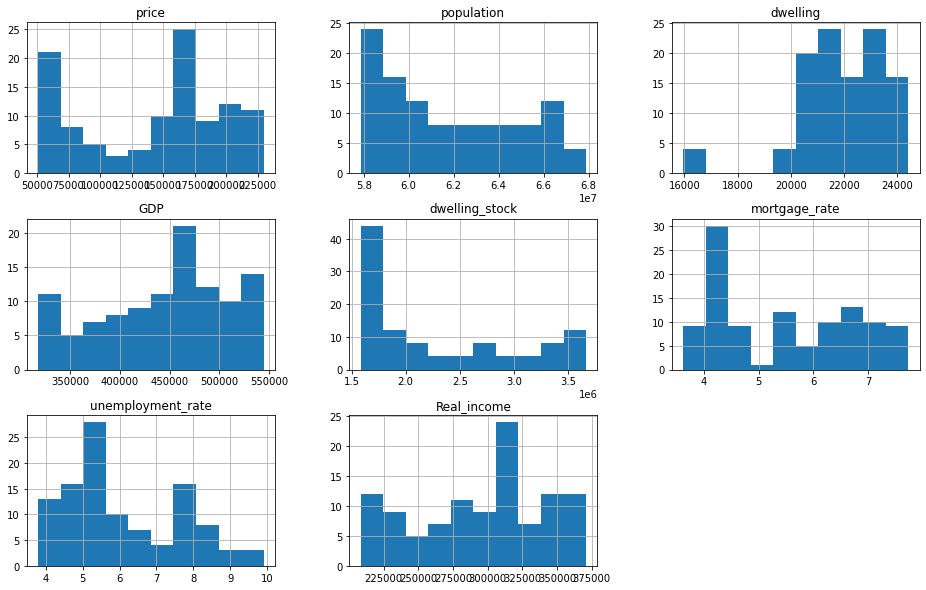

In [436]:
data.hist(figsize=(16,10))

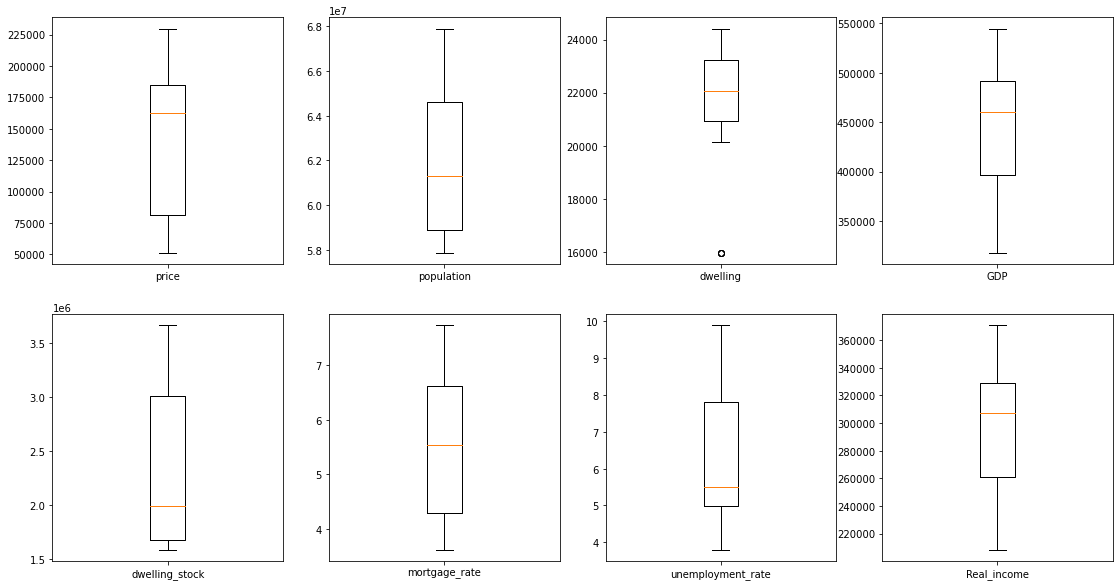

In [457]:
plt.figure(figsize=(19, 10))
plt.subplot(241)
plt.boxplot(data['price'], labels = ['price'])
plt.subplot(242)
plt.boxplot(data['population'], labels = ['population'])
plt.subplot(243)
plt.boxplot(data['dwelling'], labels = ['dwelling'])
plt.subplot(244)
plt.boxplot(data['GDP'], labels = ['GDP'])
plt.subplot(245)
plt.boxplot(data['dwelling_stock'], labels = ['dwelling_stock'])
plt.subplot(246)
plt.boxplot(data['mortgage_rate'], labels = ['mortgage_rate'])
plt.subplot(247)
plt.boxplot(data['unemployment_rate'], labels = ['unemployment_rate'])
plt.subplot(248)
plt.boxplot(data['Real_income'], labels = ['Real_income'])
plt.show()

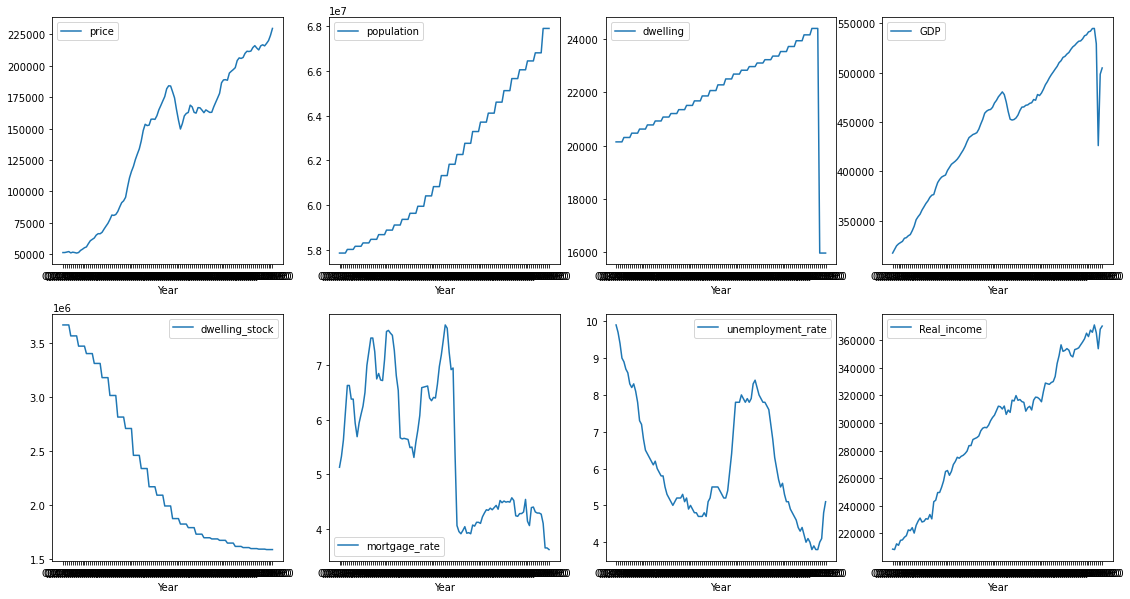

In [468]:
x=data['Year']
y0=data['price']
y1=data['population']
y2=data['dwelling']
y3=data['GDP']
y4=data['dwelling_stock']
y5=data['mortgage_rate']
y6=data['unemployment_rate']
y7=data['Real_income']


plt.figure(figsize=(19, 10))
plt.subplot(241)
plt.plot(x, y0,label='price')
plt.legend()
plt.xlabel('Year')
plt.subplot(242)
plt.plot(x, y1,label='population')
plt.legend()
plt.xlabel('Year')
plt.subplot(243)
plt.plot(x, y2,label='dwelling')
plt.legend()
plt.xlabel('Year')
plt.subplot(244)
plt.plot(x, y3,label='GDP')
plt.legend()
plt.xlabel('Year')
plt.subplot(245)
plt.plot(x, y4,label='dwelling_stock')
plt.legend()
plt.xlabel('Year')
plt.subplot(246)
plt.plot(x, y5,label='mortgage_rate')
plt.legend()
plt.xlabel('Year')
plt.subplot(247)
plt.plot(x, y6,label='unemployment_rate')
plt.legend()
plt.xlabel('Year')
plt.subplot(248)
plt.plot(x, y7,label='Real_income')
plt.legend()
plt.xlabel('Year')
plt.show()



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               108 non-null    object 
 1   price              108 non-null    int64  
 2   population         108 non-null    int64  
 3   dwelling           108 non-null    int64  
 4   GDP                108 non-null    int64  
 5   dwelling_stock     108 non-null    int64  
 6   mortgage_rate      108 non-null    float64
 7   unemployment_rate  108 non-null    float64
 8   Real_income        108 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 7.7+ KB


In [70]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
Year,0,0.0
price,0,0.0
population,0,0.0
dwelling,0,0.0
GDP,0,0.0
dwelling_stock,0,0.0
mortgage_rate,0,0.0
unemployment_rate,0,0.0
Real_income,0,0.0


In [71]:
data.isnull().sum().max()

0

### Correlation

Text(0.5, 1.0, 'Correlation Matrix')

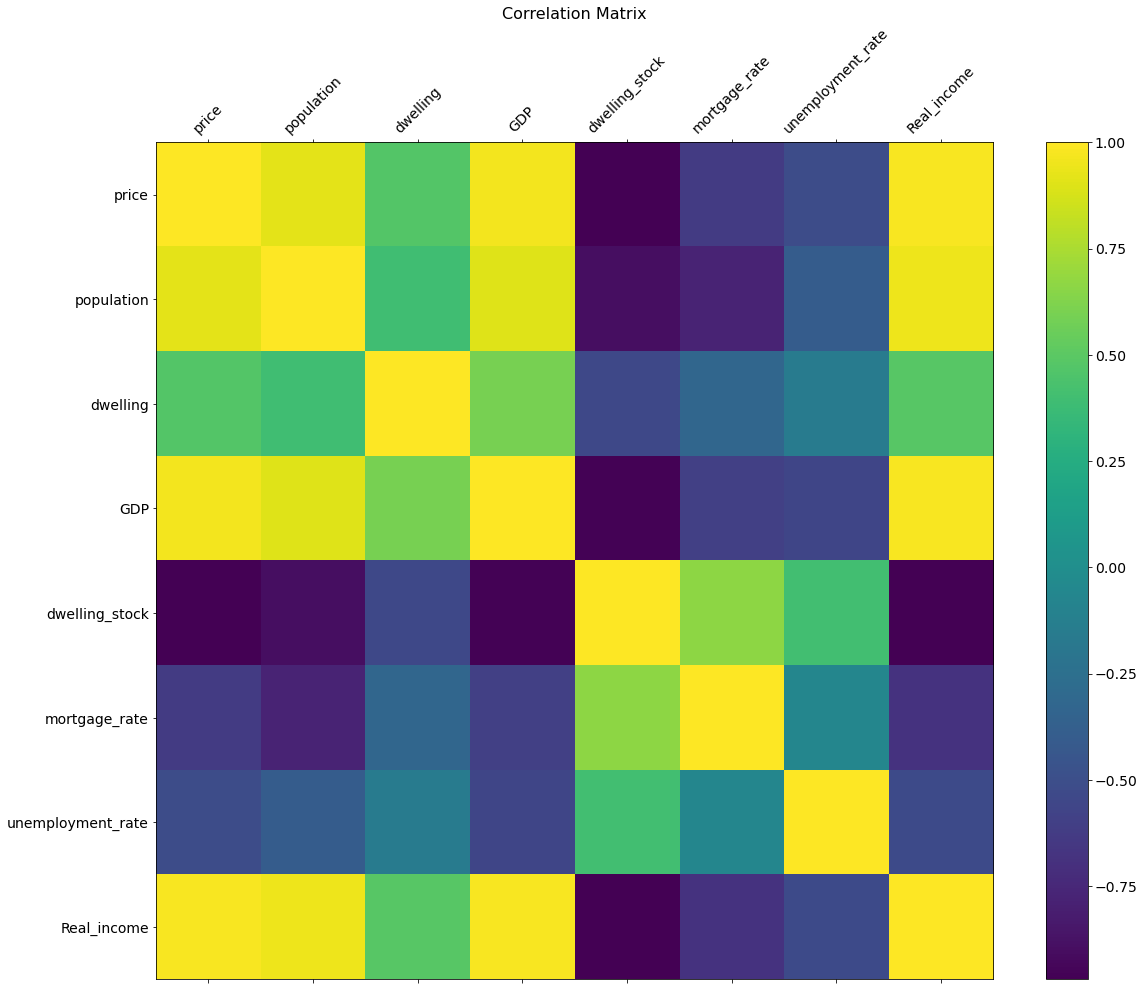

In [107]:
data = data.drop(['Year'],axis = 1)
df = data
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Stepwise regression

In [111]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [112]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [113]:
predictors_data = data.drop(columns=['price'], axis=1)
response_data = data['price']

In [130]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data,initial_list=[], 
                           threshold_in=0.03, 
                           threshold_out = 0.05, 
                           verbose=True)
print("The predictors that are selected by stepwise regression are:")
print(list_predictor_select_stepwise)

Add  Real_income                    with p-value 7.91535e-78
Add  dwelling_stock                 with p-value 5.53285e-06
Add  mortgage_rate                  with p-value 0.000182488
Add  dwelling                       with p-value 0.012535
The predictors that are selected by stepwise regression are:
['Real_income', 'dwelling_stock', 'mortgage_rate', 'dwelling']


<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-112-eca5eaf6445f>

In [131]:
multi_regression_model_1 = smf.ols(formula='price ~ Real_income+dwelling_stock+mortgage_rate+dwelling',data=data).fit()
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.14e-81
Time:                        07:37:36   Log-Likelihood:                -1135.5
No. Observations:                 108   AIC:                             2281.
Df Residuals:                     103   BIC:                             2294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.895e+04   3.86e+04     -0.

### VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=40):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [137]:
df_predictors_select_VIF = calculate_vif_(predictors_data)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)


Features above VIF threshold:

                    VIF
Real_income  115.860356
GDP           66.703567
Dropping: Real_income
Dropping: GDP
The columns remaining after VIF selection are:
Index(['population', 'dwelling', 'dwelling_stock', 'mortgage_rate',
       'unemployment_rate'],
      dtype='object')


In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

In [152]:
print("Interception: " + str(lr.intercept_) + "\n")

df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF.columns.values, "coef": lr.coef_})
print(df_coef_lr_VIF)

print("\nLinear regression score: " + str(lr.score(df_predictors_select_VIF,response_data)))

Interception: -63249.4908202003

                 var         coef
0         population     0.005831
1           dwelling    -1.109929
2     dwelling_stock    -0.056669
3      mortgage_rate  3843.024242
4  unemployment_rate -3538.095479

Linear regression score: 0.972831987096952


In [153]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     730.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.74e-78
Time:                        07:55:34   Log-Likelihood:                -1140.4
No. Observations:                 108   AIC:                             2293.
Df Residuals:                     102   BIC:                             2309.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.325e+04   7.24e+04     -0.874      0.384   -2.07e+05    8.03e+04
population            0.0058      0.001      6.508      0.000       0.004       0.008
dwelling             -1.1099      0.662     -1.677      0.097      -2.423       0.203
dwelling_stock       -0.0567      0.003    -17.546      0.000      -0.063      -0.050
mortgage_rate      3843.0242   1480.725      2.595      0.011     906.013    6780.035
unemployment_rate -3538.0955    851.132     -4.157      0.000   -5226.312   -1849.879
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.311
Skew:                           0.007   Prob(JB):                        0.856
Kurtosis:                       2.738   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso

In [220]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(max_iter=10e8, tol=0.01, normalize=True)
lasso_model.fit(X=predictors_data, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

In [221]:
lasso_model.score(X=predictors_data, y=response_data)

0.9758363789651879

In [222]:
df_coef_lasso = pd.DataFrame({"var": predictors_data.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                 var         coef
0         population     0.002060
1           dwelling    -2.445227
2                GDP     0.174455
3     dwelling_stock    -0.037045
4      mortgage_rate  3214.659079
5  unemployment_rate  -729.029853
6        Real_income     0.357165


C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615473214.2092285, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2341295681.5967674, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727371422.7055373, tolerance: 253191070.7529
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\gavin\anaconda3\envs\python\lib\site-packages\sklearn\l

(-1.3, 5.3, -29677.255216496535, 23350.672933692364)

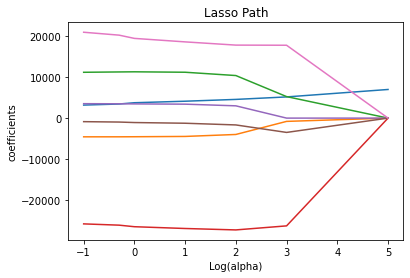

In [223]:
from itertools import cycle
from sklearn.linear_model import lasso_path
predictors_data_standardised = predictors_data/predictors_data.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [224]:
predictors_data_new = predictors_data.drop(['Real_income','GDP'], axis=1)
lasso_model.fit(X=predictors_data_new, y=response_data)

Lasso(max_iter=1000000000.0, normalize=True, tol=0.01)

In [225]:
lasso_model.score(X=predictors_data_new, y=response_data)

0.9728263117922002

In [469]:
df_coef_lasso = pd.DataFrame({"var": predictors_data_new.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                 var         coef
0         population     0.005945
1           dwelling    -1.081849
2     dwelling_stock    -0.056522
3      mortgage_rate  4012.459828
4  unemployment_rate -3454.756737


(-1.45, 8.45, -45356.12256812138, 18588.460376394825)

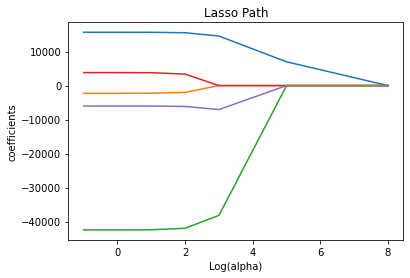

In [227]:
from itertools import cycle
from sklearn.linear_model import lasso_path
predictors_data_standardised = predictors_data_new/predictors_data_new.std(axis=0)
alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, response_data.values.reshape(-2),alphas = [.1, .5, 1, 10, 100, 1000, 100000, 100000000], fit_intercept=False)
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
     ll = plt.plot(log_alphas_lasso, coef_l)
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

### Regression Tree

In [228]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(predictors_data, response_data)

DecisionTreeRegressor(random_state=0)

In [229]:
reg_tree.score(X=predictors_data, y=response_data)

1.0

In [230]:
data.describe(include=[np.number])

,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income
count,108.000000,1.080000e+02,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000
mean,142290.990741,6.183294e+07,21955.703704,444730.074074,2.296837e+06,5.490185,6.099074,295790.935185
std,56804.657450,3.093832e+06,1717.373017,63940.667671,7.241507e+05,1.273513,1.547533,47827.254735
min,50930.000000,5.786210e+07,15950.000000,317468.000000,1.583068e+06,3.620000,3.800000,208365.000000
25%,81521.500000,5.888610e+07,20927.000000,396169.500000,1.668683e+06,4.290000,4.975000,261115.250000
50%,162247.500000,6.131910e+07,22073.000000,459800.500000,1.987343e+06,5.545000,5.500000,306959.500000
75%,184734.250000,6.459680e+07,23236.000000,491801.500000,3.011995e+06,6.622500,7.800000,329007.750000
max,229819.000000,6.788601e+07,24414.000000,544733.000000,3.666190e+06,7.740000,9.900000,370990.000000


In [290]:
ave=np.mean(data['price'])
ave

142290.99074074073

In [291]:
a=pd.DataFrame({'over_mean':data['price']>=ave})
a

,over_mean
0,False
1,False
2,False
3,False
4,False
...,...
103,True
104,True
105,True
106,True


In [292]:
b = pd.concat( [data , a], axis=1 )
b

,price,population,dwelling,GDP,dwelling_stock,mortgage_rate,unemployment_rate,Real_income,over_mean
0,51327,57862100,20139,317468,3666190,5.13,9.9,208676,False
1,51362,57862100,20139,321166,3666190,5.33,9.7,208365,False
2,51731,57862100,20139,324811,3666190,5.63,9.4,212502,False
3,52114,57862100,20139,326734,3666190,6.13,9.0,211454,False
4,51084,58024800,20305,328056,3564590,6.63,8.9,215037,False
...,...,...,...,...,...,...,...,...,...
103,215925,66796800,24414,544733,1587164,4.27,3.8,370990,True
104,217911,67886011,15950,529223,1583068,4.10,4.0,365330,True
105,220133,67886011,15950,426197,1583068,3.65,4.1,353774,True
106,224337,67886011,15950,498429,1583068,3.65,4.8,367916,True


In [293]:
A = b.drop(['over_mean','price'], axis=1)
y = b['over_mean']

In [294]:
y.value_counts()

True     67
False    41
Name: over_mean, dtype: int64

In [295]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([True,False])
labels_fea = le.transform(b['over_mean'])
pd.Series(labels_fea).value_counts()

1    67
0    41
dtype: int64

In [296]:
from sklearn.feature_extraction import DictVectorizer
A_dict = A.to_dict('record')
print(A_dict[1])

{'population': 57862100, 'dwelling': 20139, 'GDP': 321166, 'dwelling_stock': 3666190, 'mortgage_rate': 5.33, 'unemployment_rate': 9.7, 'Real_income': 208365}


C:\Users\gavin\anaconda3\envs\python\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [312]:
vec = DictVectorizer()
A_mat = vec.fit_transform(A_dict)
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['GDP', 'Real_income', 'dwelling', 'dwelling_stock', 'mortgage_rate']
{'population': 5, 'dwelling': 2, 'GDP': 0, 'dwelling_stock': 3, 'mortgage_rate': 4, 'unemployment_rate': 6, 'Real_income': 1}


In [313]:
print(A_mat.shape)
print(type(A_mat))
A_array = A_mat.toarray()
print(A_array.shape)
print(type(A_array))

(108, 7)
<class 'scipy.sparse.csr.csr_matrix'>
(108, 7)
<class 'numpy.ndarray'>


In [314]:
train_d, test_d, train_lab, test_lab = train_test_split(A_array, labels_fea)
print("train_d: " + str(train_d.shape))
print("test_d: " + str(test_d.shape))

train_d: (81, 7)
test_d: (27, 7)


In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        16

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



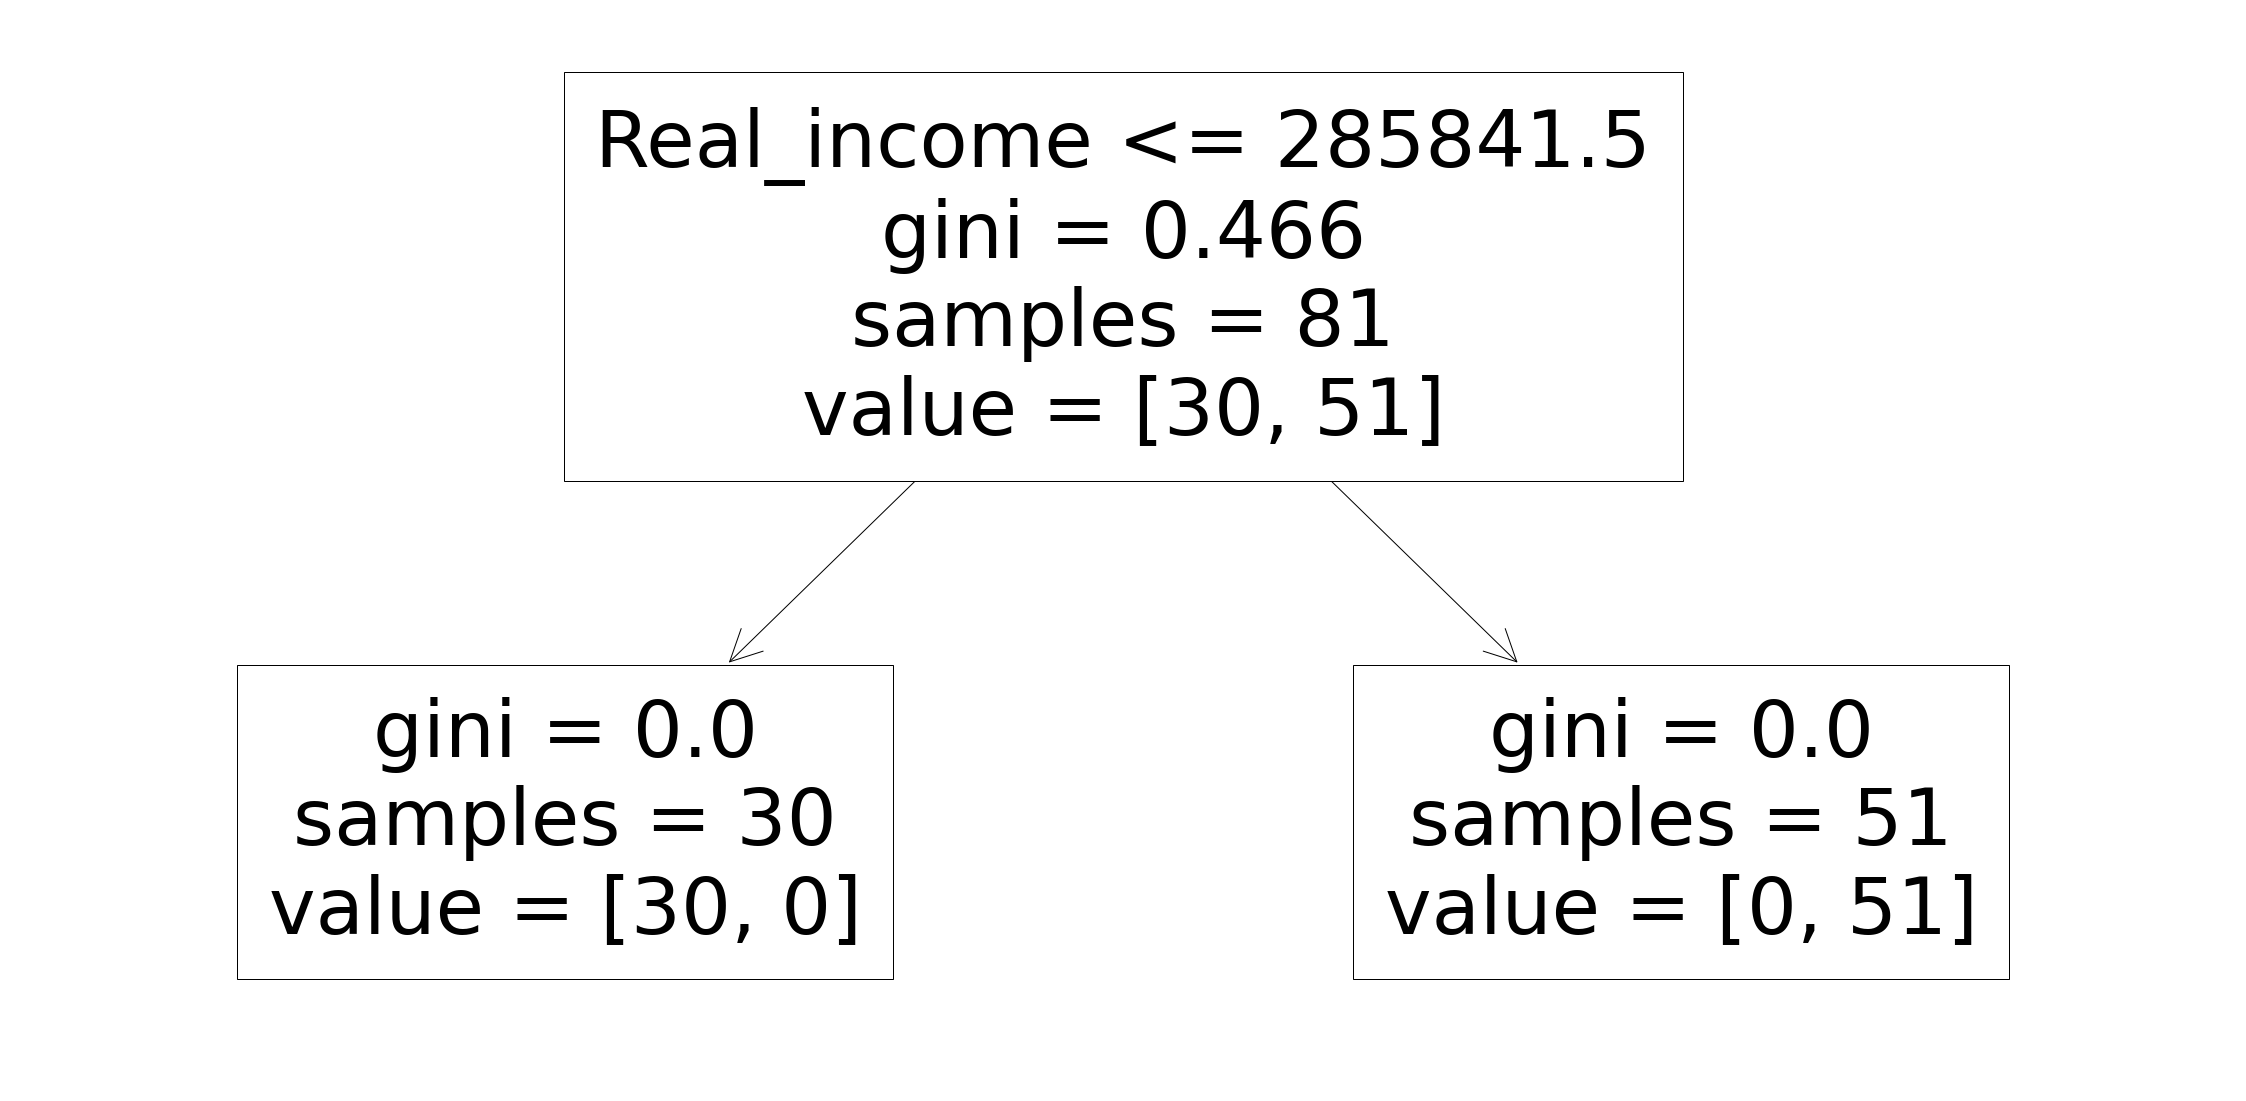

In [363]:
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5)
decision_tree_depth_5.fit(train_d, train_lab)
plt.figure(figsize=(40,20))
from sklearn import tree
_ = tree.plot_tree(decision_tree_depth_5, feature_names = vec.feature_names_)
plt.show()

In [302]:
from sklearn.tree import export_text
tree_rules = export_text(decision_tree_depth_5, feature_names=vec.feature_names_)
print(tree_rules)

|--- GDP <= 434782.50
|   |--- class: 0
|--- GDP >  434782.50
|   |--- class: 1



### Random forest

In [365]:
X = data.drop(['price'], axis=1)
y = data['price']
print(X.shape)
print(y.shape)

(108, 7)
(108,)


In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(75, 7)
(16, 7)
(17, 7)


In [367]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [370]:
rf.score(X_train, y_train)

0.9992672842931396

In [369]:
rf.score(X_val, y_val)

0.9409411755979974

In [374]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t
print("max_score: " + str(max_score))
print("best_no_trees: " + str(best_no_trees))

max_score: 0.9648880832866025
best_no_trees: 10


In [375]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [376]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9992508843960151
The score on the development data:
0.9615517267558523


In [377]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 150}
The best score is: 
0.9916343328541046


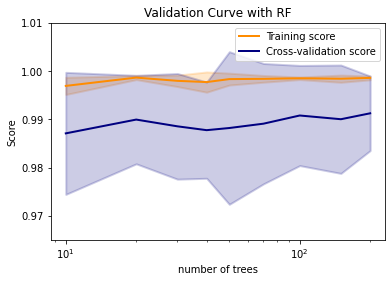

In [386]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.965, 1.01)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [387]:
rf_final.score(X_test, y_test)

0.98924537977507

***
<a id="ID_Method"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 4.0 | Methodology

***
<a id="ID_Results"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 5.0 | Results

***
<a id="ID_Discussion"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 6.0 | Discussion

***
<a id="ID_Conclusion"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## 7.0 | Conclusion

***
<a id="ID_Biblio"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## Bibliography

***
<a id="ID_Appendix"></a>
| [1.0 Introduciton](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Data Presentation](#ID_Data) | [4.0 Methodology](#ID_Method) | [5.0 Results](#ID_Results) | [6.0 Discussion](#ID_Discussion) | [7.0 Conclusion](#ID_Conclusion) | [Bibliography](#ID_Biblio) | [Appendix](#ID_Appendix) |

## Appendix